# Introduction to Data Science 


## Lab 5: Data Cleaning

**British University in Egypt**<br>
**Instructors:** Nahla Barakat
---

In [33]:
from IPython.display import HTML
style = "<style>div.exercise { background-color: #ffcccc;border-color: #E9967A; border-left: 5px solid #800080; padding: 0.5em;}</style>"
HTML(style)

# Table of Contents
<strong>
<ol start="1">
  <li> More pandas for data cleaning</li>
   <li>Visualization</li>
</ol>

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Part 1:  More pandas for data cleaning

A common type of messy dataset is tabular data designed for presentation, where variables form both the rows and columns, and column headers are values, not variable names.

In [35]:
Data=pd.DataFrame({'Day':['Monday','Tuesday','Wedenesday','Thursday','Friday'],
                   'Chicago':[30,32,36,28,30],
                   'Cairo':[20,22,26,18,20],
                   'Berlin':[25,27,31,23,25]})

Data

,Day,Chicago,Cairo,Berlin
0,Monday,30,20,25
1,Tuesday,32,22,27
2,Wedenesday,36,26,31
3,Thursday,28,18,23
4,Friday,30,20,25


We defined a dataframe that represents temperature of some cities, we need to expand this dataframe, so we create useful cols. we can do it using pd.melt

### pd.melt
[Function Documentation](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)

In [36]:
## id_vars use a column as an identifer
pd.melt(Data,id_vars=['Day'])

,Day,variable,value
0,Monday,Chicago,30
1,Tuesday,Chicago,32
2,Wedenesday,Chicago,36
3,Thursday,Chicago,28
4,Friday,Chicago,30
5,Monday,Cairo,20
6,Tuesday,Cairo,22
7,Wedenesday,Cairo,26
8,Thursday,Cairo,18
9,Friday,Cairo,20


In [37]:
pd.melt(Data,id_vars=['Day'],var_name='Cities',value_name='Temperature')

,Day,Cities,Temperature
0,Monday,Chicago,30
1,Tuesday,Chicago,32
2,Wedenesday,Chicago,36
3,Thursday,Chicago,28
4,Friday,Chicago,30
5,Monday,Cairo,20
6,Tuesday,Cairo,22
7,Wedenesday,Cairo,26
8,Thursday,Cairo,18
9,Friday,Cairo,20


In [38]:
## We can specify the objects (varaiables) we are interested on using value_vars
pd.melt(Data,id_vars=['Day'],value_vars=['Chicago','Cairo'])

,Day,variable,value
0,Monday,Chicago,30
1,Tuesday,Chicago,32
2,Wedenesday,Chicago,36
3,Thursday,Chicago,28
4,Friday,Chicago,30
5,Monday,Cairo,20
6,Tuesday,Cairo,22
7,Wedenesday,Cairo,26
8,Thursday,Cairo,18
9,Friday,Cairo,20


### Discretization and Binning

Some times,it is better to separate your data into ranges, so you can discover patterns in your data, or you need to analyze specific part of you data

### pd.cut
Pandas allow us to  segregate array elements into separate bins

[Function Documentation](https://pandas.pydata.org/docs/reference/api/pandas.cut.html)

In [39]:
## Sorting our data after reshaping it
newData=pd.melt(Data,id_vars=['Day'],var_name='Cities',value_name='Temperature')
newData['Temperature'].sort_values()

8     18
5     20
9     20
6     22
13    23
10    25
14    25
7     26
11    27
3     28
0     30
4     30
12    31
1     32
2     36
Name: Temperature, dtype: int64

In [40]:
# Cutting data into 3 bins based on the temperature
bins = [16, 25, 36]
pd.cut(newData['Temperature'], bins)

0     (25, 36]
1     (25, 36]
2     (25, 36]
3     (25, 36]
4     (25, 36]
5     (16, 25]
6     (16, 25]
7     (25, 36]
8     (16, 25]
9     (16, 25]
10    (16, 25]
11    (25, 36]
12    (25, 36]
13    (16, 25]
14    (16, 25]
Name: Temperature, dtype: category
Categories (2, interval[int64, right]): [(16, 25] < (25, 36]]

In [41]:
# Note that if a number is not in range of the bins, it will return nan
bins = [20, 25, 35]
pd.cut(newData['Temperature'], bins)

0     (25.0, 35.0]
1     (25.0, 35.0]
2              NaN
3     (25.0, 35.0]
4     (25.0, 35.0]
5              NaN
6     (20.0, 25.0]
7     (25.0, 35.0]
8              NaN
9              NaN
10    (20.0, 25.0]
11    (25.0, 35.0]
12    (25.0, 35.0]
13    (20.0, 25.0]
14    (20.0, 25.0]
Name: Temperature, dtype: category
Categories (2, interval[int64, right]): [(20, 25] < (25, 35]]

### Aggregation
An essential piece of analysis of large data is efficient summarization: computing aggregations like sum(), mean(), median(), min(), and max(), in which a single number gives insight into the nature of a potentially large dataset.

### built-in Pandas aggregations
**count()**     Total number of items <br>
**first()** **last()** 	First and last item<br>
**mean()**, **median()** 	Mean and median<br>
**min(), max()** 	Minimum and maximum<br>
**std(), var()** 	Standard deviation and variance<br>
**mad()** 	Mean absolute deviation<br>
**prod()** 	Product of all items<br>
**sum()** 	Sum of all items<br>

In [42]:
newData.describe()

,Temperature
count,15.000000
mean,26.200000
std,5.073742
min,18.000000
25%,22.500000
50%,26.000000
75%,30.000000
max,36.000000


In [43]:
newData['Temperature'].mean(),newData['Temperature'].min(),newData['Temperature'].max()

(26.2, 18, 36)

## Group by


### GroupBy: Split, Apply, Combine¶

Simple aggregations can give you a flavor of your dataset, but often we would prefer to aggregate conditionally on some label or index: this is implemented in the so-called groupby operation. The name "group by" comes from a command in the SQL database language.


Group by steps <br>

The split step involves breaking up and grouping a DataFrame depending on the value of the specified key.
The apply step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.
The combine step merges the results of these operations into an output array.


[Function Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

In [44]:
# Creating a data
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                'data1': range(6),'data2':[2,5,7,12,16,20]}, columns=['key', 'data1','data2'])
df

,key,data1,data2
0,A,0,2
1,B,1,5
2,C,2,7
3,A,3,12
4,B,4,16
5,C,5,20


In [45]:
df.groupby('key')

The GroupBy object is a very flexible abstraction. In many ways, you can simply treat it as if it's a collection of DataFrames, and it does the difficult things under the hood. Let's see some examples using the Planets data.

In [46]:
# Gropping then getting the Average of each key values
df.groupby('key').mean()

,data1,data2
key,,
A,1.5,7.0
B,2.5,10.5
C,3.5,13.5


In [47]:
# Specify single column
df.groupby('key')[['data1']].mean()

,data1
key,
A,1.5
B,2.5
C,3.5


In [48]:
# Gropping then getting the Different attributes for cols of each key values
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,12
B,1,16
C,2,20


## Part 2:  Visualization

There are many different libraries in python that can be used in visualization, some of them :

**Matplotlib**

Matplotlib is a visualization library in Python for 2D plots of arrays. Matplotlib is written in Python and makes use of the NumPy library. It can be used in Python and IPython shells, Jupyter notebook, and web application servers. Matplotlib comes with a wide variety of plots like line, bar, scatter, histogram, etc. which can help us, deep-dive, into understanding trends, patterns, correlations. It was introduced by John Hunter in 2002.
Seaborn

**Seaborn** is a dataset-oriented library for making statistical representations in Python. It is developed atop matplotlib and to create different visualizations. It is integrated with pandas data structures. The library internally performs the required mapping and aggregation to create informative visuals It is recommended to use a Jupyter/IPython interface in matplotlib mode.
Bokeh

**Bokeh** is an interactive visualization library for modern web browsers. It is suitable for large or streaming data assets and can be used to develop interactive plots and dashboards. There is a wide array of intuitive graphs in the library which can be leveraged to develop solutions. It works closely with PyData tools. The library is well-suited for creating customized visuals according to required use-cases. The visuals can also be made interactive to serve a what-if scenario model. All the codes are open source and available on GitHub.
Altair

**Altair** is a declarative statistical visualization library for Python. Altair’s API is user-friendly and consistent and built atop Vega-Lite JSON specification. Declarative library indicates that while creating any visuals, we need to define the links between the data columns to the channels (x-axis, y-axis, size, color). With the help of Altair, it is possible to create informative visuals with minimal code. Altair holds a declarative grammar of both visualization and interaction.

 
**plotly**

plotly.py is an interactive, open-source, high-level, declarative, and browser-based visualization library for Python. It holds an array of useful visualization which includes scientific charts, 3D graphs, statistical charts, financial charts among others. Plotly graphs can be viewed in Jupyter notebooks, standalone HTML files, or hosted online. Plotly library provides options for interaction and editing. The robust API works perfectly in both local and web browser mode.

 
**ggplot**

ggplot is a Python implementation of the grammar of graphics. The Grammar of Graphics refers to the mapping of data to aesthetic attributes (colour, shape, size) and geometric objects (points, lines, bars). The basic building blocks according to the grammar of graphics are data, geom (geometric objects), stats (statistical transformations), scale, coordinate system, and facet.

Using ggplot in Python allows you to develop informative visualizations incrementally, understanding the nuances of the data first, and then tuning the components to improve the visual representations.

### Some visualization types

**1D**
>bar chart <br>
>pie chart<br>
>histogram<br>

**2D** 
>scatter plot<br>
>line plot<br>
>box and whisker plot<br>
>heatmap

### Let's draw some plots
We will use a dataset from seaborn librarby

In [49]:
#Creating the dataset
df = sns.load_dataset('titanic') 
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [50]:
df.shape

(891, 15)

In [51]:
# Let's check values of column who
df.groupby('who').sum()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
who,,,,,,,,
child,49,218,528.67,144,105,2721.2210,0,6
man,88,1274,13700.50,159,82,13352.0656,537,410
woman,205,565,6976.00,163,153,12620.6627,0,121


### horizontal bar and normal bar

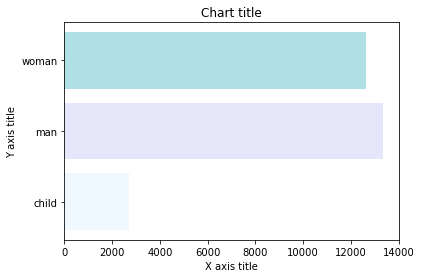

In [52]:
# Let's plot the fare of each value of class who
df1=df.groupby('who')['fare'].sum().to_frame().reset_index()

#Creating the bar chart 
plt.barh(df1['who'],df1['fare'],color = ['#F0F8FF','#E6E6FA','#B0E0E6']) 

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 

#Show the plot
plt.show()

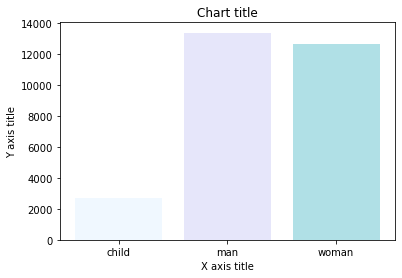

In [53]:
plt.bar(df1['who'],df1['fare'],color = ['#F0F8FF','#E6E6FA','#B0E0E6']) 
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 
#Show the plot
plt.show()

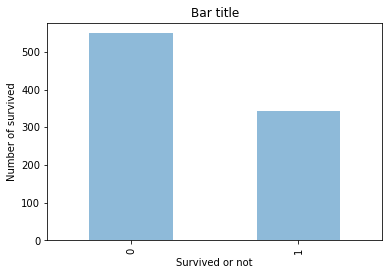

In [54]:
df.survived.value_counts().plot(kind="bar",alpha=0.5)
plt.title('Bar title')
plt.xlabel('Survived or not')
plt.ylabel('Number of survived') 
plt.show()

### Histogram

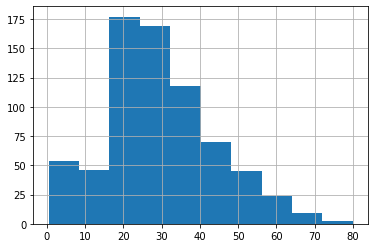

In [55]:
df.age.hist();

In [56]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [57]:
df=df.dropna()

### Pie chart

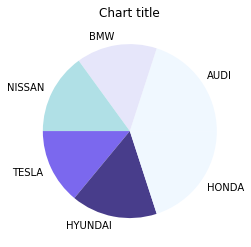

In [58]:
#Creating the dataset
cars = ['AUDI', 'BMW', 'NISSAN', 
        'TESLA', 'HYUNDAI', 'HONDA'] 
data = [20, 15, 15, 14, 16, 20] 
#Creating the pie chart
plt.pie(data, labels = cars,colors = ['#F0F8FF','#E6E6FA','#B0E0E6','#7B68EE','#483D8B'])
#Adding the aesthetics
plt.title('Chart title')
#Show the plot
plt.show()

In [59]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

### Scatter and line plots

Text(0.5, 1.0, 'Age __ Survived')

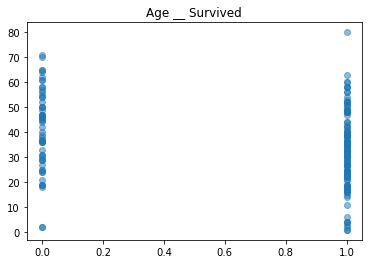

In [60]:
plt.scatter(df.survived, df.age, alpha=0.5)
plt.title("Age __ Survived")

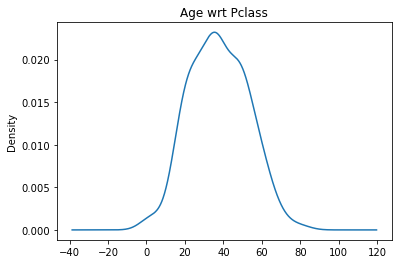

In [61]:
df.age[df.pclass == 1].plot(kind="kde")
plt.title("Age wrt Pclass")
plt.show()

### Box & whisker

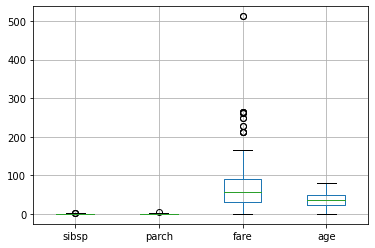

In [62]:
boxplot = df.boxplot(column=['sibsp','parch','fare', 'age'])

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

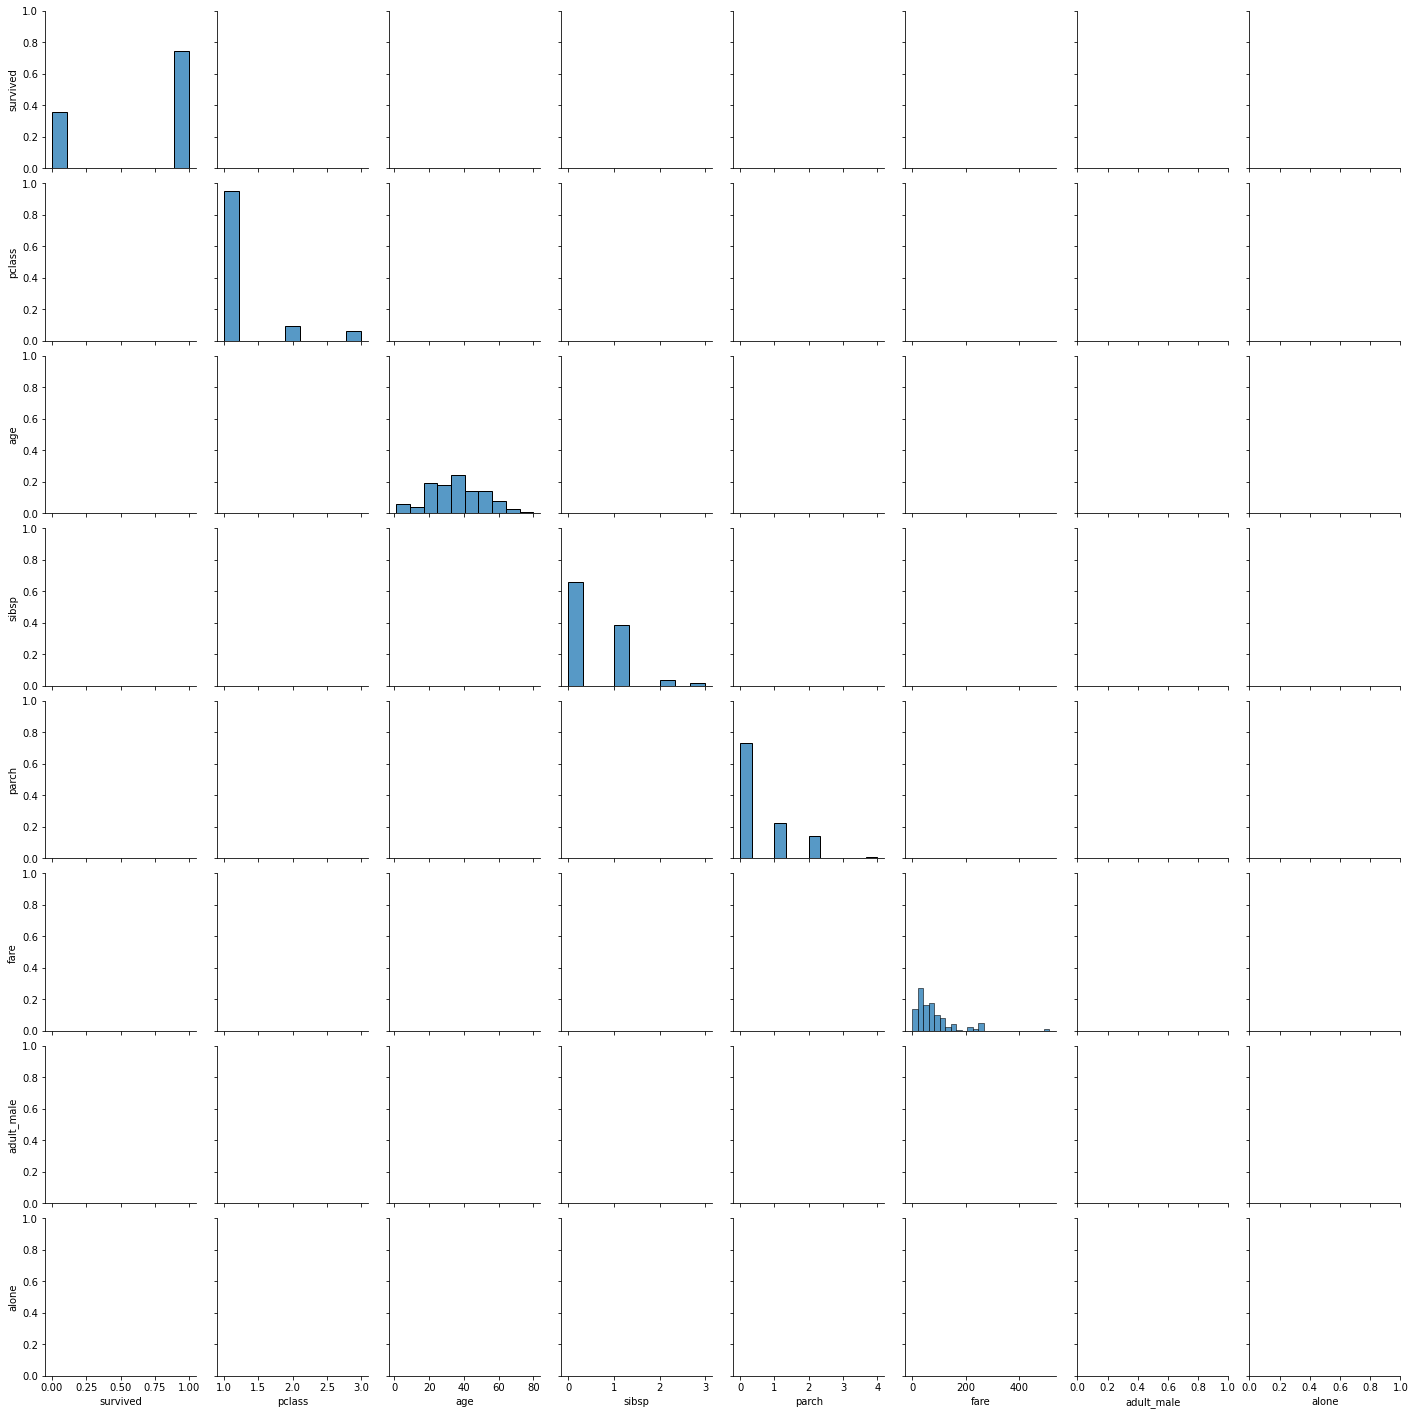

In [63]:
sns.pairplot(data=df)

### Exercise

In [ ]:
## Read the csv file in the same file and print the head()

##########Sol Here##########
dataFrame=pd.read_csv('Customer-Churn.csv')
dataFrame.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
## Print the shape of the data 
##########Sol Here##########
dataFrame.shape

(7043, 21)

In [ ]:
## print total number of nans for each column

##########Sol Here##########
dataFrame.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
## Print datatype of the columns

##########Sol Here##########
dataFrame.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
## Drop customer_id columns

##########Sol Here##########
dataFrame.drop(['customerID'],axis=1,inplace=True)

In [ ]:
## Reterive last 3 columns of the dataframe

##########Sol Here##########
dataFrame.iloc[:,-3:]

,MonthlyCharges,TotalCharges,Churn
0,29.85,29.85,No
1,56.95,1889.5,No
2,53.85,108.15,Yes
3,42.30,1840.75,No
4,70.70,151.65,Yes
...,...,...,...
7038,84.80,1990.5,No
7039,103.20,7362.9,No
7040,29.60,346.45,No
7041,74.40,306.6,Yes


In [ ]:
## Try Converting TotalCharges to float 
## you should get error try to solve this error then convert it to float

##########Sol Here##########
dataFrame=dataFrame[dataFrame['TotalCharges']!=' ']
dataFrame['TotalCharges']=dataFrame['TotalCharges'].astype('float')

<ipython-input-39-f75fdf241297>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['TotalCharges']=dataFrame['TotalCharges'].astype('float')


In [ ]:
## Reterive Total Charges between 200 and 500
## Use between function or search for it
##########Sol Here##########
dataFrame[dataFrame['TotalCharges'].between(200, 500)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
11,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,No
21,Male,0,Yes,No,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No
36,Male,0,No,No,5,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.70,316.90,Yes
40,Male,0,Yes,Yes,10,Yes,No,DSL,No,Yes,No,No,No,No,One year,No,Mailed check,49.55,475.70,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239.00,No
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7029,Female,1,No,No,6,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [ ]:
## cut the dataframe based on tenure values using 4 ranges 4->8 , 8->12, 12->16 , 16->20

##########Sol Here##########
bins = [4,8,12,16,20]
pd.cut(dataFrame['tenure'], bins)

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
7038            NaN
7039            NaN
7040    (8.0, 12.0]
7041            NaN
7042            NaN
Name: tenure, Length: 7032, dtype: category
Categories (4, interval[int64, right]): [(4, 8] < (8, 12] < (12, 16] < (16, 20]]

In [ ]:
## Plot three different plots using different libraries

##########Sol Here##########